In [1]:
from datetime import datetime

In [2]:
df = pd.read_csv('train.csv')

<IPython.core.display.Javascript object>

In [3]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,Airline C,12/06/2019,Delhi,Cochin,DEL → MAA → COK,20:40,09:25 13 Jun,12h 45m,1 stop,No info,7480
1,Airline A,18/06/2019,Banglore,Delhi,BLR → DEL,18:55,22:00,3h 5m,non-stop,No info,8016
2,Airline C,18/05/2019,Delhi,Cochin,DEL → BOM → COK,03:50,19:15,15h 25m,1 stop,No info,8879
3,Airline A,6/05/2019,Kolkata,Banglore,CCU → BOM → BLR,20:00,08:15 07 May,12h 15m,1 stop,In-flight meal not included,9663
4,Airline A,9/05/2019,Kolkata,Banglore,CCU → BOM → BLR,06:30,12:00,5h 30m,1 stop,In-flight meal not included,9663


In [4]:
df.shape

(8012, 11)

In [5]:
test = pd.read_csv('test.csv')

<IPython.core.display.Javascript object>

In [6]:
test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Airline B,27-03-2019,Delhi,Cochin,DEL → HYD → COK,04:55,16:10,11h 15m,1 stop,No info
1,Airline E,27-05-2019,Kolkata,Banglore,CCU → BLR,22:20,28-05-2020 00:40,2h 20m,non-stop,No info
2,Airline C,06-06-2019,Kolkata,Banglore,CCU → IXR → DEL → BLR,05:50,20:25,14h 35m,2 stops,No info
3,Airline A,06-03-2019,Banglore,New Delhi,BLR → MAA → DEL,09:45,14:25,4h 40m,1 stop,No info
4,Airline B,15-06-2019,Delhi,Cochin,DEL → BOM → COK,16:00,16-06-2020 01:30,9h 30m,1 stop,No info


In [7]:
test.shape

(2671, 10)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8012 entries, 0 to 8011
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          8012 non-null   object
 1   Date_of_Journey  8012 non-null   object
 2   Source           8012 non-null   object
 3   Destination      8012 non-null   object
 4   Route            8011 non-null   object
 5   Dep_Time         8012 non-null   object
 6   Arrival_Time     8012 non-null   object
 7   Duration         8012 non-null   object
 8   Total_Stops      8011 non-null   object
 9   Additional_Info  8012 non-null   object
 10  Price            8012 non-null   int64 
dtypes: int64(1), object(10)
memory usage: 688.7+ KB


In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


In [10]:
# Checking the Null Values in the train dataset
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [11]:
df[df.Route.isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
1807,Airline C,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


### Both the null values are present in a single row, dropping the row.

In [12]:
df.dropna(inplace=True)

In [13]:
# Checking the null values in Test Dataset
test.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

## Data Cleaning, Extraction & EDA

In [14]:
# Checking the duration feature of train dataset
df.Duration.value_counts()

2h 50m     412
1h 30m     286
2h 55m     255
2h 45m     250
2h 35m     249
          ... 
35h 35m      1
26h 45m      1
27h 55m      1
25h 10m      1
37h 10m      1
Name: Duration, Length: 353, dtype: int64

In [15]:
# Converting Duration hours in minutes in Train dataset
df['Duration']=  df['Duration'].str.replace("h", '*60').str.replace(' ','+').str.replace('m','*1').apply(eval)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

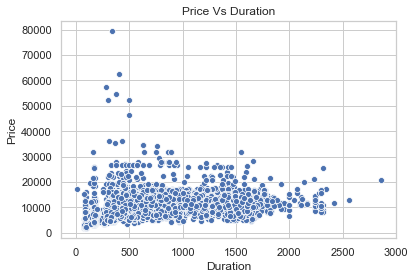

In [16]:
# Duration Vs Price
sns.set(style='whitegrid')
sns.scatterplot( x= 'Duration', y='Price', data=df,  palette='viridis')
plt.title('Price Vs Duration')
plt.xlabel('Duration')
plt.ylabel('Price')
plt.show()

In [17]:
# Converting Duration hours in minutes in Test dataset
test['Duration']=  test['Duration'].str.replace("h", '*60').str.replace(' ','+').str.replace('m','*1').apply(eval)

In [18]:
# Extracting the features from Date of journey column to get optimum advantage in Train Dataset.

df['Day_of_Week'] = pd.to_datetime(df["Date_of_Journey"], format = '%d/%m/%Y').dt.day_name()
df['isweekend'] = np.where(df.Day_of_Week.isin(['Saturday','Sunday']),1,0)
df['Journey_day'] = pd.to_datetime(df['Date_of_Journey'],format='%d/%m/%Y').dt.day
df['Journey_month'] = pd.to_datetime(df['Date_of_Journey'], format='%d/%m/%Y').dt.month

# As we dont require the Date_of_journey feature anymore, dropping it 

df.drop('Date_of_Journey', axis=1,inplace=True)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

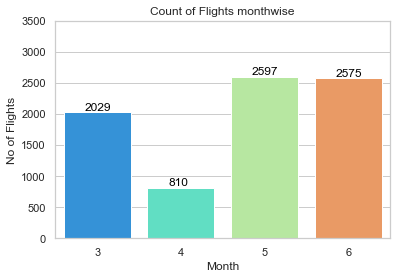

In [19]:
# Count of Flights monthwise

sns.set(style='whitegrid')
ax = sns.countplot(x='Journey_month', data=df, palette='rainbow')
plt.title('Count of Flights monthwise')
plt.xlabel('Month')
plt.ylabel('No of Flights')
plt.ylim(0,3500)
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom',
                    color= 'black')

In [20]:
# Extracting the features from Date of journey column to get optimum advantage in Test Dataset.

test['Day_of_Week'] = pd.to_datetime(test["Date_of_Journey"], format = '%d-%m-%Y').dt.day_name()
test['isweekend'] = np.where(test.Day_of_Week.isin(['Saturday','Sunday']),1,0)
test['Journey_day'] = pd.to_datetime(test['Date_of_Journey'],format='%d-%m-%Y').dt.day
test['Journey_month'] = pd.to_datetime(test['Date_of_Journey'], format='%d-%m-%Y').dt.month

# As we dont require the Date_of_journey feature anymore, dropping it 

test.drop('Date_of_Journey', axis=1,inplace=True)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [21]:
# Extracting Features from Departure Time & Arrival Time in training Dataset

## Departure Time
df['Dep_hour'] = pd.to_datetime(df['Dep_Time']).dt.hour
df['Dep_min'] = pd.to_datetime(df['Dep_Time']).dt.minute

# Dropping Dep_Time as it is of no use 
df.drop('Dep_Time',axis=1,inplace=True)

## Arrival Time 

df['Arrival_hour'] = pd.to_datetime(df['Arrival_Time']).dt.hour
df['Arrival_min'] = pd.to_datetime(df['Arrival_Time']).dt.minute

# Dropping Arrival_Time as it is of no use 
df.drop('Arrival_Time',axis=1,inplace=True)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [22]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day_of_Week,isweekend,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,Airline C,Delhi,Cochin,DEL → MAA → COK,765,1 stop,No info,7480,Wednesday,0,12,6,20,40,9,25
1,Airline A,Banglore,Delhi,BLR → DEL,185,non-stop,No info,8016,Tuesday,0,18,6,18,55,22,0
2,Airline C,Delhi,Cochin,DEL → BOM → COK,925,1 stop,No info,8879,Saturday,1,18,5,3,50,19,15
3,Airline A,Kolkata,Banglore,CCU → BOM → BLR,735,1 stop,In-flight meal not included,9663,Monday,0,6,5,20,0,8,15
4,Airline A,Kolkata,Banglore,CCU → BOM → BLR,330,1 stop,In-flight meal not included,9663,Thursday,0,9,5,6,30,12,0


In [23]:
# Extracting Features from Departure Time & Arrival Time in test Dataset

## Departure Time
test['Dep_hour'] = pd.to_datetime(test['Dep_Time']).dt.hour
test['Dep_min'] = pd.to_datetime(test['Dep_Time']).dt.minute

# Dropping Dep_Time as it is of no use 
test.drop('Dep_Time',axis=1,inplace=True)

## Arrival Time 

test['Arrival_hour'] = pd.to_datetime(test['Arrival_Time']).dt.hour
test['Arrival_min'] = pd.to_datetime(test['Arrival_Time']).dt.minute

# Dropping Arrival_Time as it is of no use 
test.drop('Arrival_Time',axis=1,inplace=True)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [24]:
# Corresponding independent Features of the dataset where the Price is maximum
df.loc[df.Price.idxmax()]

Airline                  Airline J
Source                    Banglore
Destination              New Delhi
Route              BLR → BOM → DEL
Duration                       340
Total_Stops                 1 stop
Additional_Info     Business class
Price                        79512
Day_of_Week                 Friday
isweekend                        0
Journey_day                      1
Journey_month                    3
Dep_hour                         5
Dep_min                         45
Arrival_hour                    11
Arrival_min                     25
Name: 1870, dtype: object

In [25]:
# Corresponding independent Features of the dataset where the Price is minimum
df.loc[df.Price.idxmin()]

Airline            Airline E
Source                Mumbai
Destination        Hyderabad
Route              BOM → HYD
Duration                  90
Total_Stops         non-stop
Additional_Info      No info
Price                   1759
Day_of_Week        Wednesday
isweekend                  0
Journey_day                3
Journey_month              4
Dep_hour                  22
Dep_min                   45
Arrival_hour               0
Arrival_min               15
Name: 5176, dtype: object

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

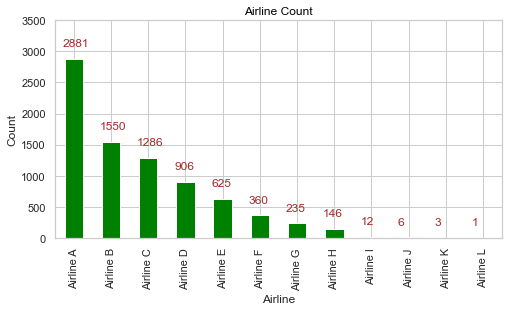

In [26]:
# Airline Count plot
ax = df.Airline.value_counts().plot(kind='bar',figsize=(8, 4),color='green')
plt.title('Airline Count', fontsize= 12, color = 'black')
plt.xlabel('Airline')
plt.ylabel('Count')
plt.ylim(0,3500)
for idx, val in enumerate(df.Airline.value_counts()):
    plt.text(x=idx - 0.3, y=val + 200, s=val,color='brown', fontsize=12)
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

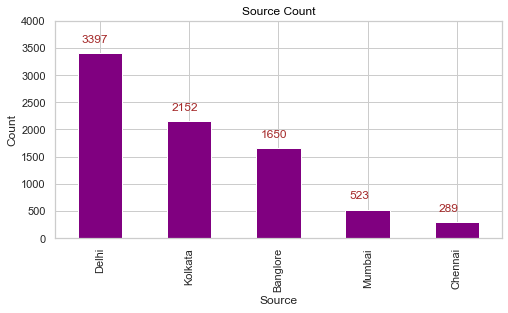

In [27]:
# Source Count Plot
ax = df.Source.value_counts().plot(kind='bar',figsize=(8, 4),color='purple')
plt.title('Source Count', fontsize= 12, color = 'black')
plt.xlabel('Source')
plt.ylabel('Count')
plt.ylim(0,4000)
for idx, val in enumerate(df.Source.value_counts()):
    plt.text(x=idx-0.2 , y=val + 200, s=val,color='brown', fontsize=12)
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

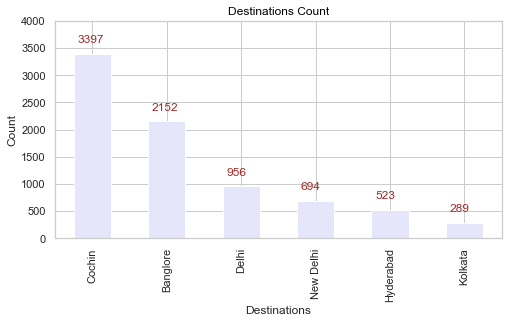

In [28]:
# Destination Count Plot
ax = df.Destination.value_counts().plot(kind='bar',figsize=(8, 4),color='lavender')
plt.title('Destinations Count', fontsize= 12, color = 'black')
plt.xlabel('Destinations')
plt.ylabel('Count')
plt.ylim(0,4000)
for idx, val in enumerate(df.Destination.value_counts()):
    plt.text(x=idx-0.2 , y=val + 200, s=val,color='brown', fontsize=12)
plt.show()

In [29]:
pd.crosstab(df.Source, df.Destination)

<IPython.core.display.Javascript object>

Destination,Banglore,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
Source,,,,,,
Banglore,0,0,956,0,0,694
Chennai,0,0,0,0,289,0
Delhi,0,3397,0,0,0,0
Kolkata,2152,0,0,0,0,0
Mumbai,0,0,0,523,0,0


### The Delhi-Cochin & Kolkata-Banglore are the most busiest routes

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

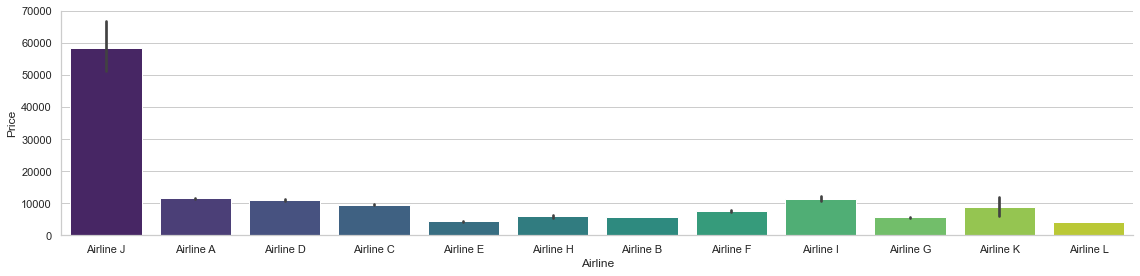

In [30]:
# Relationship of Airline feature with the Target variable (Price)

sns.set(style='whitegrid')
ax = sns.catplot(x ='Airline', y='Price',data=df.sort_values('Price', ascending=False),kind='bar',height = 4, aspect=4, palette='viridis')

In [31]:
df.Total_Stops.value_counts()

1 stop      4235
non-stop    2630
2 stops     1112
3 stops       34
Name: Total_Stops, dtype: int64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

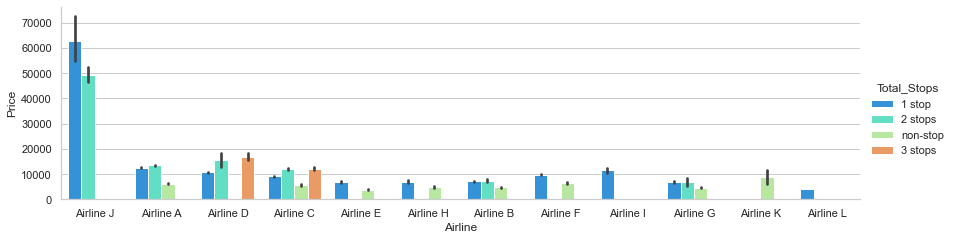

In [32]:
# Relationship of Airline with Price in the presence of no of stops
sns.set(style='whitegrid')
ax = sns.catplot(x ='Airline', y='Price',hue='Total_Stops',data=df.sort_values('Price', ascending=False),kind='bar',height = 3.5, aspect=3.5, palette='rainbow')

### Prices of the Airline J are abnormally high irrespective of the no of stops.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

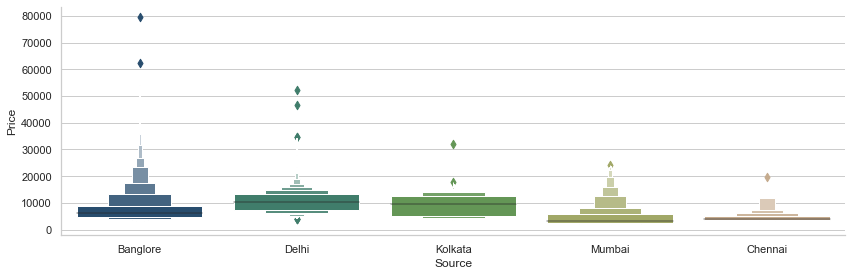

In [33]:
# Relationship of Source vs Price 

sns.set(style='whitegrid')
ax = sns.catplot(x ='Source', y='Price',data=df.sort_values('Price', ascending=False),kind='boxen',height = 4, aspect=3,palette='gist_earth')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

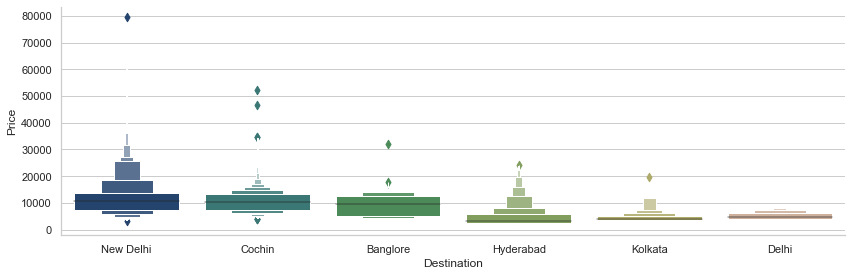

In [34]:
# Relationship of Destination vs Price 

sns.set(style='whitegrid')
ax = sns.catplot(x ='Destination', y='Price',data=df.sort_values('Price', ascending=False),kind='boxen',height = 4, aspect=3,palette='gist_earth')

In [35]:
# Checking the additional info feature

df.Additional_Info.value_counts()

No info                         6250
In-flight meal not included     1492
No check-in baggage included     249
1 Long layover                     9
Business class                     3
No Info                            3
Change airports                    2
2 Long layover                     1
Red-eye flight                     1
1 Short layover                    1
Name: Additional_Info, dtype: int64

In [36]:
test.Additional_Info.value_counts()

No info                         2094
In-flight meal not included      490
No check-in baggage included      71
1 Long layover                    10
Change airports                    5
Business class                     1
Name: Additional_Info, dtype: int64

In [37]:
# Replacing the non frequent values with other in train dataset
df.Additional_Info.replace({'No Info':'No info','Change airports':'other','2 Long layover':'other',
                            'Red-eye flight':'other','1 Short layover':'other'},inplace=True)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

([0, 1, 2, 3, 4, 5], <a list of 6 Text major ticklabel objects>)

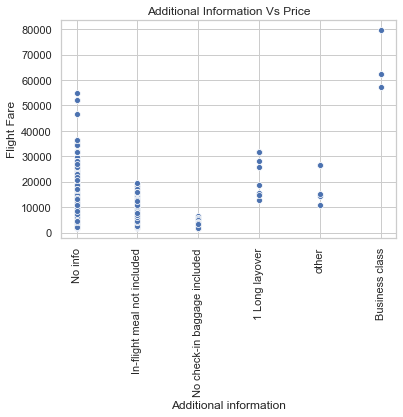

In [38]:
sns.set(style='whitegrid')
sns.scatterplot(x='Additional_Info', y='Price', data=df,palette='cubehelix')
plt.title('Additional Information Vs Price')
plt.xlabel('Additional information')
plt.ylabel('Flight Fare')
plt.xticks(rotation=90)

In [39]:
# Replacing the non frequent values with other in test dataset
test.Additional_Info.replace({'Change airports':'other'},inplace=True)

In [40]:
# Extracting the Total Stops feature
df.Total_Stops.value_counts()

1 stop      4235
non-stop    2630
2 stops     1112
3 stops       34
Name: Total_Stops, dtype: int64

In [41]:
df.Total_Stops.replace({'non-stop':0, '1 stop':1, '2 stops':2, '3 stops':3}, inplace=True)

In [42]:
test.Total_Stops.value_counts()

1 stop      1390
non-stop     861
2 stops      408
3 stops       11
4 stops        1
Name: Total_Stops, dtype: int64

In [43]:
test.Total_Stops.replace({'non-stop':0, '1 stop':1, '2 stops':2, '3 stops':3, '4 stops':4}, inplace=True)

In [44]:
# As Route & no of stops depicts almost the same thing , dropping route from the train & test dataset

df = df.drop('Route',  axis=1)
test = test.drop('Route', axis=1)

In [45]:
df.Day_of_Week.unique()

array(['Wednesday', 'Tuesday', 'Saturday', 'Monday', 'Thursday', 'Sunday',
       'Friday'], dtype=object)

In [46]:
df.Day_of_Week.replace({'Monday':1,'Tuesday':2,'Wednesday':3, 'Thursday':4, 'Friday':5, 'Saturday':6, 'Sunday':7},
                       inplace=True)

In [47]:
test.Day_of_Week.replace({'Monday':1,'Tuesday':2,'Wednesday':3, 'Thursday':4, 'Friday':5, 'Saturday':6, 'Sunday':7},
                         inplace=True)

In [48]:
df.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Day_of_Week,isweekend,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,Airline C,Delhi,Cochin,765,1,No info,7480,3,0,12,6,20,40,9,25
1,Airline A,Banglore,Delhi,185,0,No info,8016,2,0,18,6,18,55,22,0
2,Airline C,Delhi,Cochin,925,1,No info,8879,6,1,18,5,3,50,19,15
3,Airline A,Kolkata,Banglore,735,1,In-flight meal not included,9663,1,0,6,5,20,0,8,15
4,Airline A,Kolkata,Banglore,330,1,In-flight meal not included,9663,4,0,9,5,6,30,12,0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

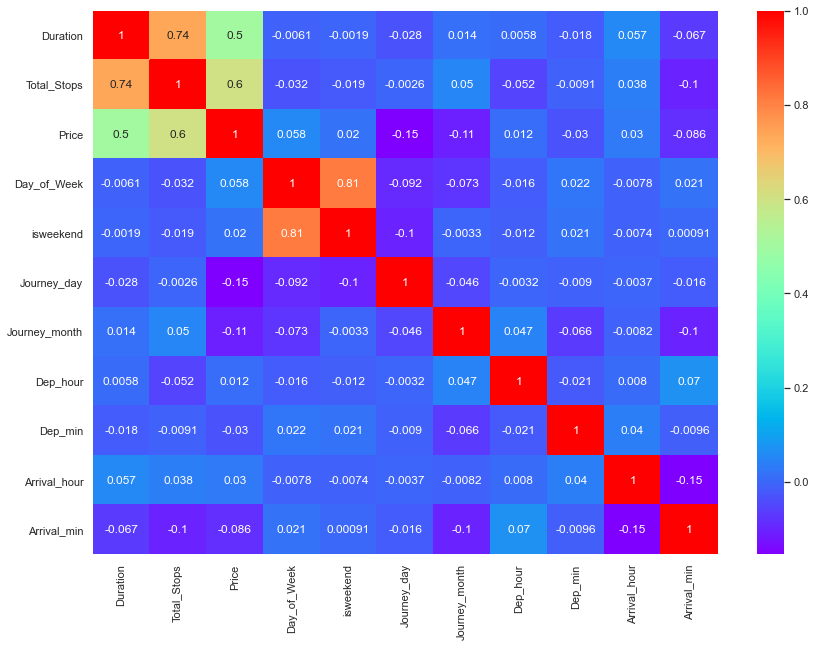

In [49]:
# Correlation 
plt.figure(figsize = (14,10))
sns.heatmap(df.corr(), annot = True, cmap = "rainbow")
plt.show()

In [50]:
# Dropping the dependent Variable 
df1 = df.drop('Price',axis=1)

In [51]:
# Dividing the Categorical & Numerical features in Train Dataset

categorical_cols= df1.select_dtypes(include= np.object)
numerical_cols = df1.select_dtypes(include= np.number)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [52]:
categorical_cols.head()

,Airline,Source,Destination,Additional_Info
0,Airline C,Delhi,Cochin,No info
1,Airline A,Banglore,Delhi,No info
2,Airline C,Delhi,Cochin,No info
3,Airline A,Kolkata,Banglore,In-flight meal not included
4,Airline A,Kolkata,Banglore,In-flight meal not included


### Encoding of the Categorical Columns

In [53]:
from sklearn.preprocessing import  LabelEncoder
le = LabelEncoder()
categorical_cols = categorical_cols.apply(le.fit_transform)

In [54]:
categorical_cols.head()

,Airline,Source,Destination,Additional_Info
0,2,2,1,4
1,0,0,2,4
2,2,2,1,4
3,0,3,0,2
4,0,3,0,2


In [55]:
# Dividing the Categorical & Numerical features in Test Dataset

categorical_cols_T= test.select_dtypes(include= np.object)
numerical_cols_T = test.select_dtypes(include= np.number)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [56]:
categorical_cols_T = categorical_cols_T.apply(le.fit_transform)

In [57]:
categorical_cols_T.head()

,Airline,Source,Destination,Additional_Info
0,1,2,1,4
1,4,3,0,4
2,2,3,0,4
3,0,0,5,4
4,1,2,1,4


In [58]:
test = pd.concat([categorical_cols_T,numerical_cols_T],axis=1)
test.head()

<IPython.core.display.Javascript object>

,Airline,Source,Destination,Additional_Info,Duration,Total_Stops,Day_of_Week,isweekend,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,1,2,1,4,675,1,3,0,27,3,4,55,16,10
1,4,3,0,4,140,0,1,0,27,5,22,20,0,40
2,2,3,0,4,875,2,4,0,6,6,5,50,20,25
3,0,0,5,4,280,1,3,0,6,3,9,45,14,25
4,1,2,1,4,570,1,6,1,15,6,16,0,1,30


In [59]:
test.shape

(2671, 14)

In [60]:
X = pd.concat([categorical_cols, numerical_cols], axis=1)
y= df['Price']

<IPython.core.display.Javascript object>

In [61]:
X.head()

,Airline,Source,Destination,Additional_Info,Duration,Total_Stops,Day_of_Week,isweekend,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,2,2,1,4,765,1,3,0,12,6,20,40,9,25
1,0,0,2,4,185,0,2,0,18,6,18,55,22,0
2,2,2,1,4,925,1,6,1,18,5,3,50,19,15
3,0,3,0,2,735,1,1,0,6,5,20,0,8,15
4,0,3,0,2,330,1,4,0,9,5,6,30,12,0


In [62]:
X.shape

(8011, 14)

In [63]:
# training testing and splitting the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [64]:
print("The size of training input is", X_train.shape)
print("The size of training output is", y_train.shape)
print(50 *'*')
print("The size of testing input is", X_test.shape)
print("The size of testing output is", y_test.shape)

The size of training input is (5607, 14)
The size of training output is (5607,)
**************************************************
The size of testing input is (2404, 14)
The size of testing output is (2404,)


In [65]:
from sklearn import metrics
import numpy as np
from sklearn.metrics import mean_squared_log_error
# We have created a function to print accuracy metrics which can be used
# to get accuracy metrics of all models in upcoming steps
def print_accuracy_report(y_test, y_pred,X_test, model):
 print('R Squared(Accuracy)', metrics.r2_score(y_test, y_pred))   
 print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
 print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
 print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
 print('Root Mean Squared Log Error',np.sqrt(mean_squared_log_error( y_test, y_pred )))

In [71]:
# Bayesian Ridge Model
from sklearn.linear_model import BayesianRidge
from sklearn.metrics import accuracy_score
def BayesianRidgeModel(X,y):
 X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=42, test_size=0.3)
 regressor = BayesianRidge()  
 regressor.fit(X_train, y_train)
 y_pred = regressor.predict(X_test)
 print(print_accuracy_report(y_test, y_pred, X_test, regressor))
 return regressor
linearModel = BayesianRidgeModel(X,y)

R Squared(Accuracy) 0.4440754270918622
Mean Absolute Error: 2371.4274407612093
Mean Squared Error: 12554669.524722615
Root Mean Squared Error: 3543.256909218215
Root Mean Squared Log Error 0.3425298097715494
None


## Random Forest Regressor 

In [72]:
from sklearn.ensemble import RandomForestRegressor
def RandomForestRegressorModel(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=42, test_size=0.3)
    rf = RandomForestRegressor(random_state=42)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    print(print_accuracy_report(y_test, y_pred, X_test, rf))
    return rf
randomForestModel = RandomForestRegressorModel(X,y)

R Squared(Accuracy) 0.8821631653126651
Mean Absolute Error: 735.7900932424134
Mean Squared Error: 2661156.907671573
Root Mean Squared Error: 1631.3052772769336
Root Mean Squared Log Error 0.13982594919171293
None


## XGBoost

In [74]:
from xgboost import XGBRegressor
def XGBRegressorModel(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=42, test_size=0.3)
    rf = XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =42, nthread = -1)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    print(print_accuracy_report(y_test, y_pred, X_test, rf))
    return rf
xgbRegressorModel = XGBRegressorModel(X,y)


[22:26:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


R Squared(Accuracy) 0.866070873152999
Mean Absolute Error: 1031.8035936910976
Mean Squared Error: 3024575.6515184604
Root Mean Squared Error: 1739.1307172028387
Root Mean Squared Log Error 0.16565974864637245
None


In [75]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
params = {
  'reg_alpha':[1e-5]
}
def XGBoostRegressorModel(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=42, test_size=0.3)
    rf=XGBRegressor(learning_rate =0.1, n_estimators=240,
     subsample=0.8, colsample_bytree=0.8,
     scale_pos_weight=1, seed=42, max_depth= 10, min_child_weight=5,gamma=0.0, reg_alpha=1e-5)
    rf_random = GridSearchCV(estimator = rf, param_grid = params, cv = 3, verbose=2, n_jobs = 8)
    rf_random.fit(X_train, y_train)
    print(rf_random.best_params_)
    y_pred = rf_random.best_estimator_.predict(X_test)
    print(print_accuracy_report(y_test, y_pred, X_test, rf_random.best_estimator_))
    return rf_random.best_estimator_
xgBoostModel = XGBoostRegressorModel(X,y)

Fitting 3 folds for each of 1 candidates, totalling 3 fits
{'reg_alpha': 1e-05}
R Squared(Accuracy) 0.8917555510118564
Mean Absolute Error: 759.3309677047856
Mean Squared Error: 2444528.180905573
Root Mean Squared Error: 1563.4986987220593
Root Mean Squared Log Error 0.1414302654387776
None


## Final Prrediction

In [84]:
y_predict = xgBoostModel.predict(test)

In [85]:
y_predict

array([ 5688.0444,  3935.4524, 11822.882 , ..., 12881.289 ,  4640.6836,
        7941.3975], dtype=float32)

In [86]:
df = pd.DataFrame(y_predict,columns = ['Price'])

<IPython.core.display.Javascript object>

In [87]:
# Saving to Csv

df.to_csv('final_submission.csv',index=None,header=True)

# using Random Forest 

In [88]:
y_predict = randomForestModel.predict(test)

In [89]:
y_predict

array([ 6777.54,  3912.37, 12075.38, ..., 13630.26,  4433.82,  8121.04])

In [90]:
df = pd.DataFrame(y_predict,columns = ['Price'])

<IPython.core.display.Javascript object>

In [91]:
# Saving to Csv

df.to_csv('final_submission1.csv',index=None,header=True)